In [1]:
import seaborn as sns
import pandas as pd

from catdog.utils.image import plot_image_bbox

/home/nico/anaconda3/envs/aaut-catdog/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("../data/all_data.csv", index_col=0)

In [3]:
data

,file,width,height,depth,class,xmin,ymin,xmax,ymax
0,Cats_Test1539.png,438,590,3,cat,176,33,367,262
1,Cats_Test1488.png,500,334,3,cat,129,38,243,182
2,Cats_Test3486.png,500,333,3,dog,213,144,289,201
3,Cats_Test2031.png,380,500,3,dog,84,24,342,404
4,Cats_Test2689.png,500,410,3,dog,186,32,355,170
...,...,...,...,...,...,...,...,...,...
3681,Cats_Test511.png,500,333,3,cat,117,21,263,194
3682,Cats_Test2431.png,446,500,3,cat,142,114,399,384
3683,Cats_Test3566.png,300,225,3,dog,119,54,228,128
3684,Cats_Test2236.png,500,375,3,dog,204,150,276,211


In [4]:
data["file"] = "../data/images/"+data["file"]

In [5]:
samples = data.sample(5)

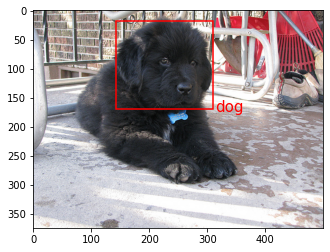

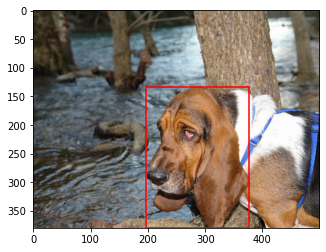

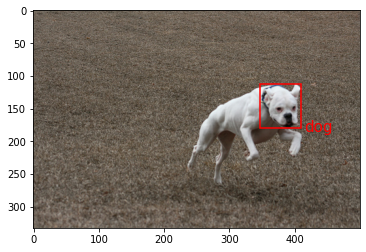

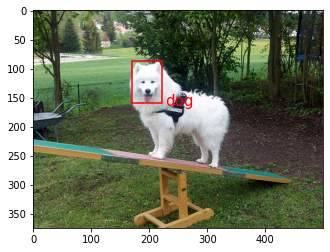

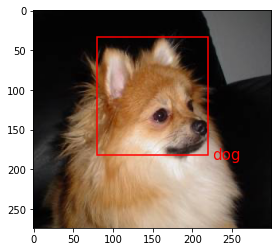

In [6]:
for sample in samples[["file", "class", "xmin", "ymin", "xmax", "ymax"]].values:
    plot_image_bbox(*sample)

# Data analysis

### Class distribution

In [7]:
data.groupby("class").size() / len(data)

class
cat    0.322301
dog    0.677699
dtype: float64

<AxesSubplot:xlabel='class', ylabel='count'>

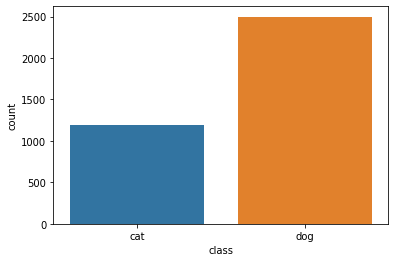

In [8]:
sns.countplot(data=data, x="class")

Hay un claro desbalance de clases, un predictor que siempre diga "dog" tiene un accuracy de 0.67

### Image size distribution

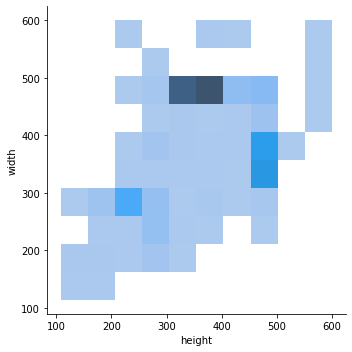

In [13]:
sns.displot(data=data, x="height", y="width", kind="hist", bins=(10,10))